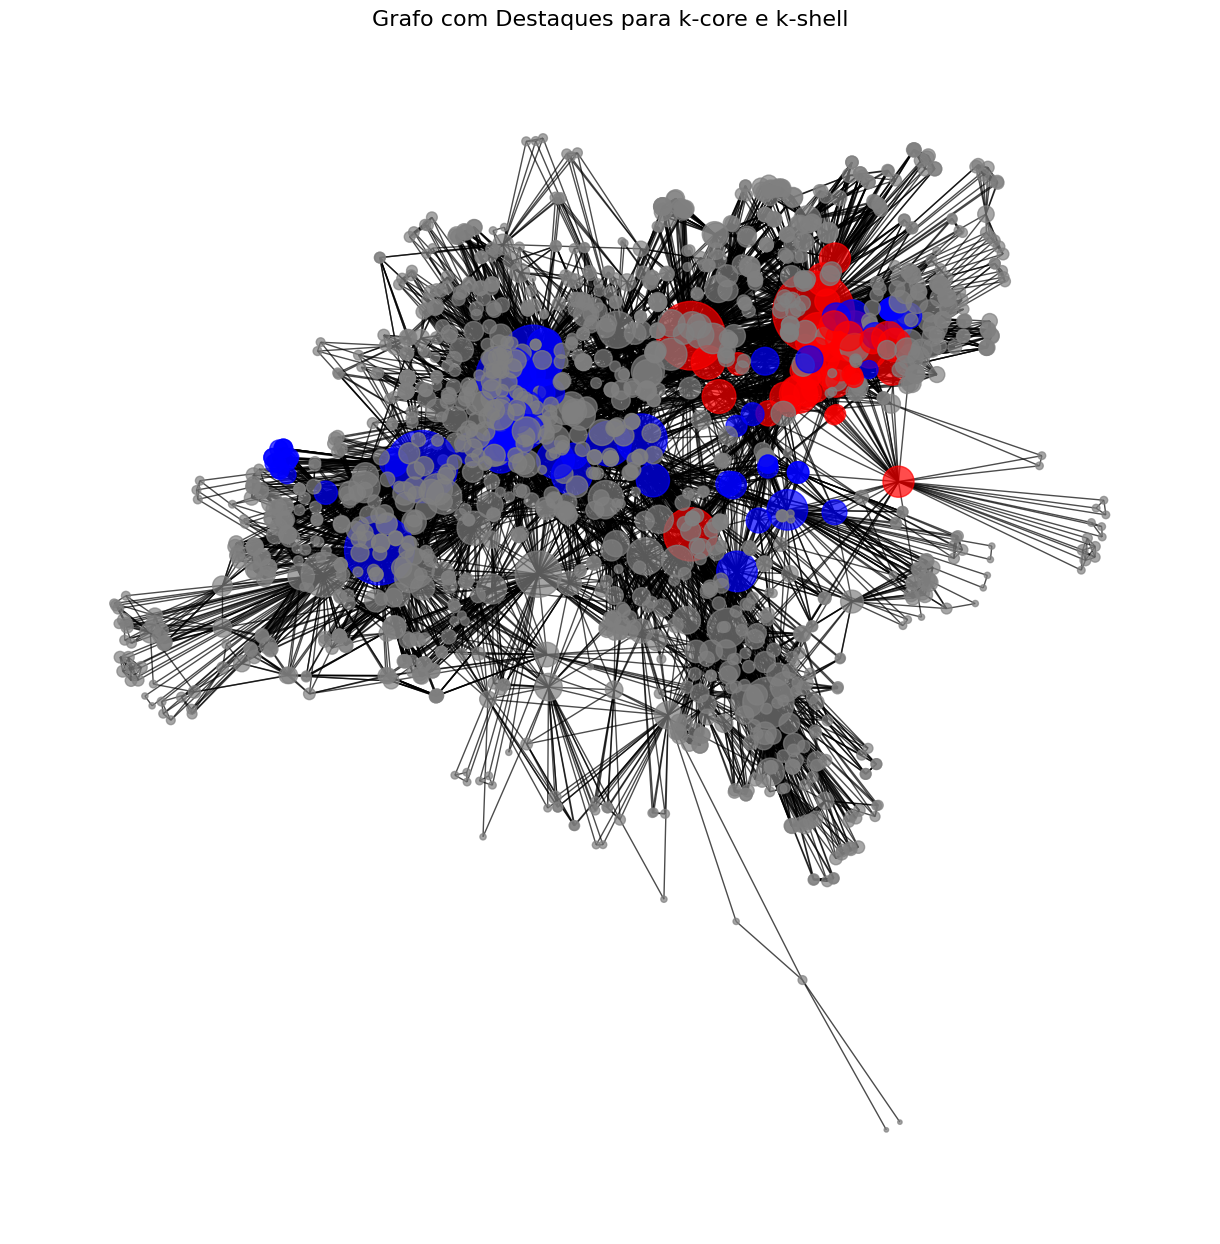

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o grafo do arquivo .gexf
input_file = "network.gexf"  # Substitua pelo caminho correto do arquivo
grafo = nx.read_gexf(input_file)

# Eliminar arestas de auto-conexão (self-loops)
grafo.remove_edges_from(nx.selfloop_edges(grafo))

# Calcular o k-core para todos os nós
grau_core = nx.core_number(grafo)  # Dicionário com o valor de k-core por nó
nx.set_node_attributes(grafo, grau_core, "k-core")

# Identificar o maior k-core
k_core_max = max(grau_core.values())
nós_maior_k_core = [nó for nó, valor in grau_core.items() if valor == k_core_max]

# Calculando o grau de cada nó para o tamanho dos nós
graus = dict(grafo.degree())
nx.set_node_attributes(grafo, graus, "grau")

# Estabelecendo o tamanho dos nós (proporcional ao grau) e cor para destacar k-core e k-shell
tamanho_nós = [graus[nó] * 10 for nó in grafo.nodes()]  # Aumenta o tamanho com base no grau
cores_nós = []  # Lista de cores para cada nó

for nó in grafo.nodes():
    if nó in nós_maior_k_core:
        cores_nós.append("red")  # Cor para nós no maior k-core
    elif grau_core[nó] == k_core_max - 1:
        cores_nós.append("blue")  # Cor para nós no k-shell
    else:
        cores_nós.append("gray")  # Cor para os outros nós

# Visualizando o grafo
plt.figure(figsize=(12, 12))  # Tamanho da tela do gráfico
posição = nx.spring_layout(grafo, seed=42)  # Layout para disposição dos nós

# Desenhando o grafo com as configurações anteriores
nx.draw(
    grafo,
    pos=posição,
    with_labels=False,  # Não mostrar rótulos dos nós
    node_size=tamanho_nós,  # Tamanho dos nós
    node_color=cores_nós,  # Cores dos nós
    edge_color="black",  # Cor das arestas
    alpha=0.7,  # Transparência das arestas
)

# Adicionando título ao gráfico
plt.title("Grafo com Destaques para k-core e k-shell", fontsize=16)
plt.show()
